Copyright 2021 Victor I A.

&emsp;

Licensed under the Apache License, Version 2.0 (the "License");

you may not use this file except in compliance with the License.

You may obtain a copy of the License at


&emsp;https://www.apache.org/licenses/LICENSE-2.0


Unless required by applicable law or agreed to in writing, software

distributed under the License is distributed on an "AS IS" BASIS,

WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and

limitations under the License.

## Motivational Example


Concepts will be covered:


*   Regression, Classification
*   Flattening
*   [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning), Softmax
*   Dropout
*   Training and Testing



**References:**

1.   [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)
2.   [tensorflow 2.0 tutorial](https://www.tensorflow.org/tutorials)
3.   [tensorflow 2.0 launch note](https://medium.com/tensorflow/tensorflow-2-0-is-now-available-57d706c2a9ab)




## Import Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

## Preparing the Training Data

Load [mnist](http://yann.lecun.com/exdb/mnist/) dataset as distributed with keras


In [22]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(np.unique(y_train))
print(np.unique(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


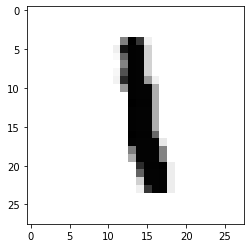

In [24]:
plt.imshow(x_train[6], cmap='Greys'); # Choose an image at a particular index

In [25]:
y_train[6]

1


Data preparation:
* the data came in the form of `uint8` with value in the `[0, 255]` range. We need to transform it into Python `float32` array with values between 0 and 1.

In [26]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # Called Normalization

## Defining, Compiling and Fitting Our Model



### Model 1: 

Our network has three layers:

* **First Layer: input** `tf.keras.layers.Flatten` — This layer flattens the digit images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). This layer only reformats the data.

* **Second Layer: "hidden"** `tf.keras.layers.Dense`— A densely connected layer of 512 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer. Recall that we flattened the image. 


* **output** `tf.keras.layers.Dense` — A 10-node *softmax* layer, with each node representing each of the digit class. As in the previous layer, each node takes input from the 512 nodes in the layer before it. Each node weights the input according to learned parameters, and then outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
h = model.fit(x_train, y_train, epochs=10, batch_size=256)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.5246 - accuracy: 0.8469
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1447 - accuracy: 0.9574
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0907 - accuracy: 0.9728
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.06

The `batch_size` tells `model.fit` to update the model variables after every batches of 256 images.

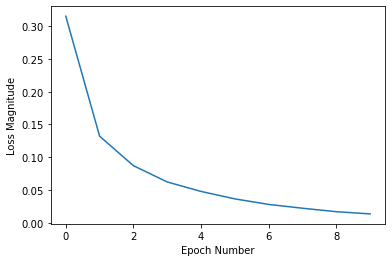

In [28]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(h.history['loss'])

In [29]:
eval_loss, eval_acc = model.evaluate(x_test, 
                                     y_test)
print('Test accuracy: {}'.format(eval_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9821
Test accuracy: 0.9821000099182129


### Model 2

In [30]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), #Fine tune parameters
  tf.keras.layers.Dense(10, activation='softmax')
])
model2.summary()
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
h = model2.fit(x_train, y_train,
               epochs=10,
               batch_size=256)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.8432 - accuracy: 0.7590
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.2490 - accuracy: 0.9304
Epoch 3/10
235/235 [==========================

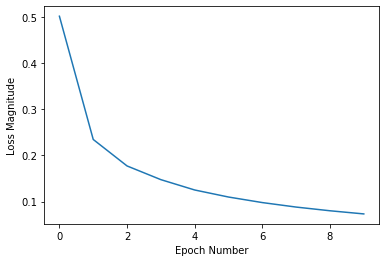

In [31]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(h.history['loss'])

In [32]:
eval_loss, eval_acc = model2.evaluate(x_test, 
                                      y_test)
print('Test accuracy: {}'.format(eval_acc))

313/313 [==============================] - 0s 896us/step - loss: 0.0786 - accuracy: 0.9754
Test accuracy: 0.9753999710083008


***

In [40]:
img = x_test[3]
print(img.shape)
img = np.array([img])
print(img.shape)

(28, 28)
(1, 28, 28)


In [41]:
prediction = model2.predict(img)
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(prediction * 100)

[[ 99.96  0.00  0.01  0.00  0.00  0.00  0.02  0.00  0.00  0.01]]


In [42]:
#np.argmax(prediction[3])

IndexError: index 3 is out of bounds for axis 0 with size 1

In [43]:
y_test[3]

0

***

# USEFUL LINKS

https://www.youtube.com/watch?v=xVlMfDZrhEs&list=PLLYcwf8xZSe3bwXDeFjHtj8OgQdhn-l1J&index=3 #Notebook extensions

https://setosa.io/ev/image-kernels/ #How images are represented in a computer

https://www.youtube.com/watch?v=sh-MQboWJug # Visualizing CNN learning Features

https://www.cs.cmu.edu/~aharley/vis/ #Interactive Visualization of CNN